<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/finalProject/finalProjectTeam2_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I


### 1. Design your CRISP Model as shown in Figure 1:

In [ ]:
#Part I: Multiple Linear Regression
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Attributes: Price, Age, Kilometers, HP, Fuel_Type, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, etc.
#Data Preparation:

#Load the data and inspect it.
#Clean the data by handling missing values, outliers, and data types.
#Split the data into training (50%), validation (30%), and test (20%) datasets.
#Modeling:

#Run a multiple linear regression with the specified predictor variables.
#Identify the most important car specifications for predicting the car's price.
#Evaluation:

#Assess the model's performance using appropriate metrics (e.g., RMSE, R-squared).
#Identify the three or four most important car specifications for predicting the price.
#Part II: Regression Trees
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications using regression trees.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Data Preparation:

#Split the data into training (60%) and validation (40%) datasets.
#Convert categorical variables (e.g., Fuel_Type) to dummy variables.
#Modeling:

#Run a full-grown regression tree with the specified predictor variables.
#Set random_state=1.
#Evaluation:

#Identify the most important car specifications for predicting the car's price.
#Compare the prediction errors of the training and validation sets by examining their RMSE and boxplots.
#Predict the price of a Toyota Corolla with given specifications.

### 2.  Split the data into training (50%), validation (30%), and test (20%)datasets.

In [26]:
#run cell with next 2 lines uncommented and use "Choose Files" GUI to load ToyotaCorolla.xlsx
#from google.colab import files
#uploaded = files.upload()

In [27]:
import pandas as pd

corolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name="data")
print(corolla.shape)

# Drop any rows with missing values (if any)
corolla = corolla.dropna()
print(corolla.shape)

(1436, 39)
(1436, 39)


In [28]:
# prior to splitting data we perfrom some data preparation steps that propagate through the training, validation, and test data sets
# and save time performing each step on those data sets individually in subsequent tasks

#the first of thes stepse is lmiting the columns of data to those fields listed in question 3

predictors = ["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax", "Mfr_Guarantee",
"Guarantee_Period", "Airco", "Automatic_airco", "CD_Player", "Powered_Windows",
"Sport_Model", "Tow_Bar"]
outcome = ["Price"]

corrola_data = corolla[predictors + outcome].copy()
corrola_data.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price
0,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0,13500
1,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0,13750
2,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,13950
3,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,14950
4,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0,13750


In [29]:
#next we convert the column "Fuel_Type" to dummy variables to accomodate data building in task 3 and Part II

corrola_enc = corrola_data.copy()
corrola_enc = pd.get_dummies(corrola_enc, columns=["Fuel_Type"], dtype = "int", drop_first=True)
corrola_enc.head()

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,13500,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,13750,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,13950,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,14950,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,13750,1,0


In [30]:
# WIth these data preparation steps complete, we split the data into training (50%), validation (30%), and test (20%) datasets
from sklearn.model_selection import train_test_split

# Split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(
    corrola_enc.drop('Price', axis=1), corrola_enc['Price'], test_size=0.5, random_state=42)

# Now split the remaining dataset into validation and test datasets.
# 40% of the remaining 50% is 30% of total
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.4, random_state=42)

# shape is (# of rows, # of columns)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(718, 16)
(718,)
(430, 16)
(430,)
(288, 16)
(288,)


### 3.  Run a multiple linear regression with the outcome variable Price and predictor variables: Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

In [31]:
# Train the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.intercept_)
print(lr_model.coef_)


9742.208352728834
[-1.08704629e+02 -1.77211025e-02  3.25122471e+01  5.77899481e+02
  1.94880208e+02  1.54915042e+01  2.77396627e+02  6.81605818e+01
  2.46572488e+02  2.85415537e+03  3.62275419e+02  4.19159345e+02
  3.96351672e+02 -2.56982042e+02  1.84717700e+03  1.85612566e+03]


In [33]:
#display Task 3 model summary to begin assessing predictive power (performance) in subsequent tasks

#X_train = train_data[predictors]
#y_train = train_data[target]
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
#X_val = val_data[predictors]
#y_val = val_data[target]
y_pred = model.predict(X_valid)

# Calculate performance metrics
print(f"Training set score: {lr_model.score(X_train, y_train):.4f}")
print(f"Validation set score: {lr_model.score(X_valid, y_valid):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

#rmse = mean_squared_error(y_valid, y_pred, squared=False)
#r2 = r2_score(y_valid, y_pred)

# Display the performance metrics
#print(f"ML_RMSE: {rmse:.4f}")
#print(f"ML_R-squared: {r2:.4f}")
rmse, r2

Training set score: 0.8913
Validation set score: 0.8917
RMSE: 1271.2089
R-squared: 0.8917
ML_RMSE: 1271.2089
ML_R-squared: 0.8917


(1271.2088887753819, 0.8917022188907276)

### 4.  What appear to be the three or four most important car specifications for predicting the car’s price?

In [34]:
# sklearn metrics indicate our predictor variables can account for much of the variablility in price (greater than 89%).  To answer the question in this task we
# use statsmodels

import statsmodels.api as sm

# For Fun, Let's Use sm to get
# an alternative Ordinary Least Squares (OLS) Linear Regression model summary
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())
print("*"*10)
print(est2.summary2())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     359.3
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:33:02   Log-Likelihood:                -6087.1
No. Observations:                 718   AIC:                         1.221e+04
Df Residuals:                     701   BIC:                         1.229e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9742.2084    717.008  

### 5. Using metrics, you consider useful, assess the performance of the model in predicting price.

(array([  7.,  22.,  81., 196., 279., 231., 111., 134.,  98.,  65.,  26.,
        23.,  36.,  21.,  18.,  29.,  22.,   8.,  12.,   8.,   2.,   4.,
         0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.]), array([ 4350.        ,  5288.33333333,  6226.66666667,  7165.        ,
        8103.33333333,  9041.66666667,  9980.        , 10918.33333333,
       11856.66666667, 12795.        , 13733.33333333, 14671.66666667,
       15610.        , 16548.33333333, 17486.66666667, 18425.        ,
       19363.33333333, 20301.66666667, 21240.        , 22178.33333333,
       23116.66666667, 24055.        , 24993.33333333, 25931.66666667,
       26870.        , 27808.33333333, 28746.66666667, 29685.        ,
       30623.33333333, 31561.66666667, 32500.        ]), <BarContainer object of 30 artists>)


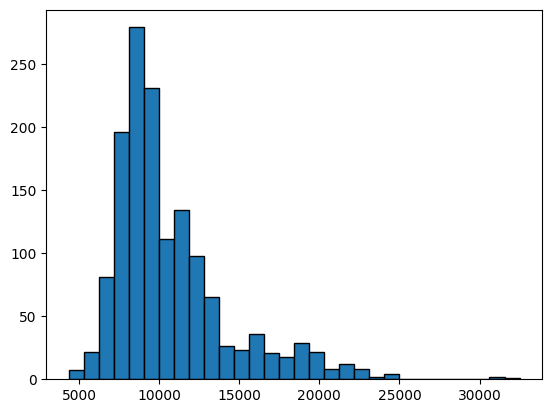

In [43]:
#see distribution of outcome varible to determine if Linear Regression assumtions of normality are reasonable

#create histogram to visualize values in dataset
import matplotlib.pyplot as plt
%matplotlib inline

print(plt.hist(corrola_enc['Price'], edgecolor='black', bins=30))

#fig = sm.qqplot(corrola_enc['Price'], line='45')
#print(plt.show())


In [55]:
print(type(corrola_enc['Price']))
print(type(corrola_enc['Price'].values))
print(type(lognorm_dataset))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [63]:

print(corrola_enc['Price'].values.shape)
print(lognorm_dataset.shape)

(1436,)
(1000,)


In [66]:
#only parameter based estimation of normaility that works as expected is Shapiro test
# the very low pvalue of the test statistic does indicate that the assumption of normality may not be valid for our Linear Regression model
# This result would support a future recommendation of exploring other outcome variable transformations or training models that better match the price outcome distribution

from scipy.stats import shapiro

print(shapiro(lognorm_dataset))
shapiro(corrola_enc['Price'].values)

#ShapiroResult(statistic=0.8573324680328369, pvalue=3.880663073872444e-29)

ShapiroResult(statistic=0.8573322892189026, pvalue=3.880496661488187e-29)


ShapiroResult(statistic=0.8522822856903076, pvalue=1.2140943021843038e-34)

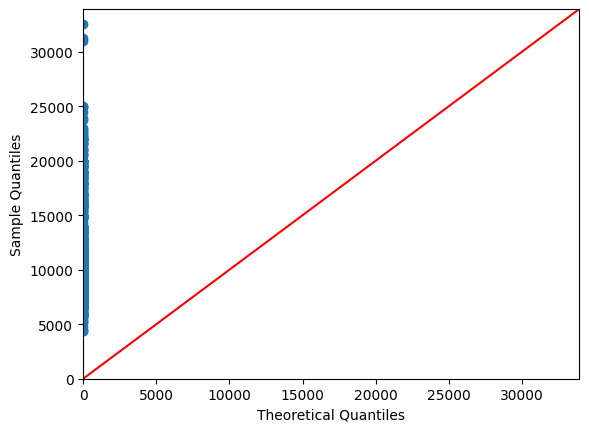

In [56]:
# We were unable to condition data to provide valid qq plot or Kolmogorov-Smirnov Test
# Future Recommendation: use invest time to generate valid tests, since shapiro test does support valid linear regression assumptions about outcome normal distribution
fig = sm.qqplot(corrola_enc['Price'].values, line='45')

plt.show()

In [67]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Kolmogorov-Smirnov test for normality
print(kstest(lognorm_dataset, 'norm'))

print(kstest(corrola_enc['Price'].values, 'norm'))

#KstestResult(statistic=0.84125708308077, pvalue=0.0)

KstestResult(statistic=0.84125708308077, pvalue=0.0, statistic_location=1.2773298091955965, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4350, statistic_sign=-1)


# Part II


### 1. Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

### 2. Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.

### 3. Which appear to be the three or four most important car specifications for predicting the car’s price?

### 4. Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?

### 5. Predict the price, using the smaller RT of a used Toyota Corolla with the specifications listed in Table 1, see below.